In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from matplotlib import animation
from matplotlib.animation import PillowWriter

import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 
plt.rcParams['figure.figsize'] = [10 , 10]

# Units

In [23]:
G_pu = 6.67430e-8       #cm^3 g^-1 s^-2
r_pu = 1.49597870707e13 #cm
m_pu = 1.989e33         #g

v_pu = np.sqrt(G_pu * m_pu / r_pu) #cm/s

time_pu = r_pu/v_pu #seconds

E_pu = G_pu*(m_pu**2)/r_pu #cm^2 g s^-2 = erg

Rescaling

In [24]:
v_pu = v_pu/1e5 #km/s
print(f"v_pu/v_iu = {v_pu:.2f} (km/s)/iu")

time_pu = time_pu/(3.156e7) #years
print(f"time_pu/time_iu = {time_pu:.3f} years/iu")

E_pu 
print(f"E_pu/E_iu = {E_pu:.2e} erg/iu")

v_pu/v_iu = 29.79 (km/s)/iu
time_pu/time_iu = 0.159 years/iu
E_pu/E_iu = 1.77e+46 erg/iu


# Plot & Animation

In [25]:
data = np.loadtxt('./sphere.out')

time = data[:, 0]
x = data[:, 1::6].T
y = data[:, 2::6].T
z = data[:, 3::6].T
vx = data[:, 4::6].T
vy = data[:, 5::6].T
vz = data[:, 6::6].T

### Plot

Text(0.5, 0, 'z[au]')

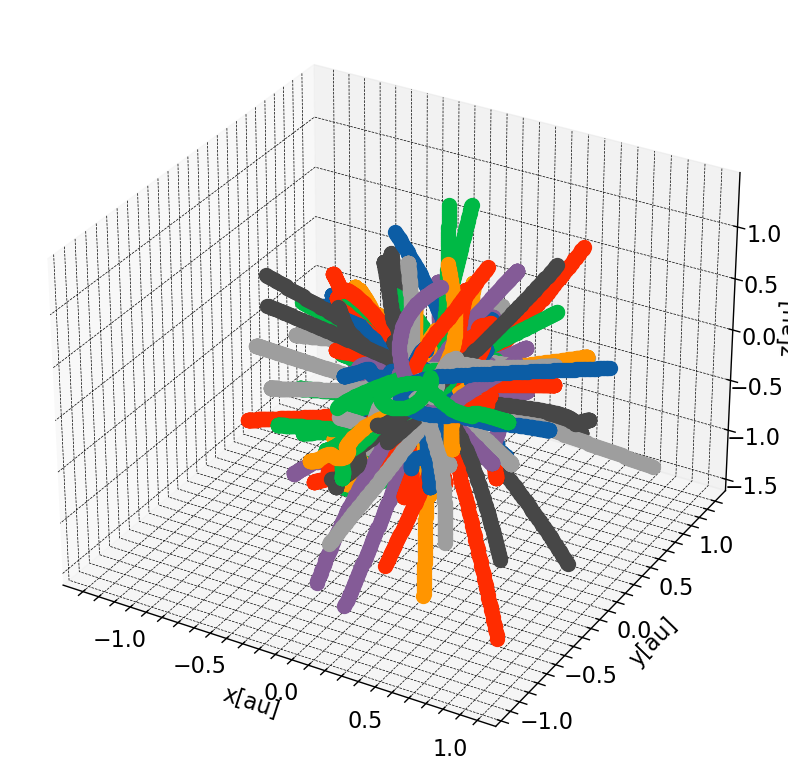

In [26]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

for i in range(len(x[:,])):
    ax.plot3D(x[i], y[i], z[i], 'o', markersize=10)

ax.set_xlabel('x[au]')
ax.set_ylabel('y[au]')
ax.set_zlabel('z[au]')

### Animation

In [27]:
# if len(x1)=N, then the animation will have N/k frames
k = 1

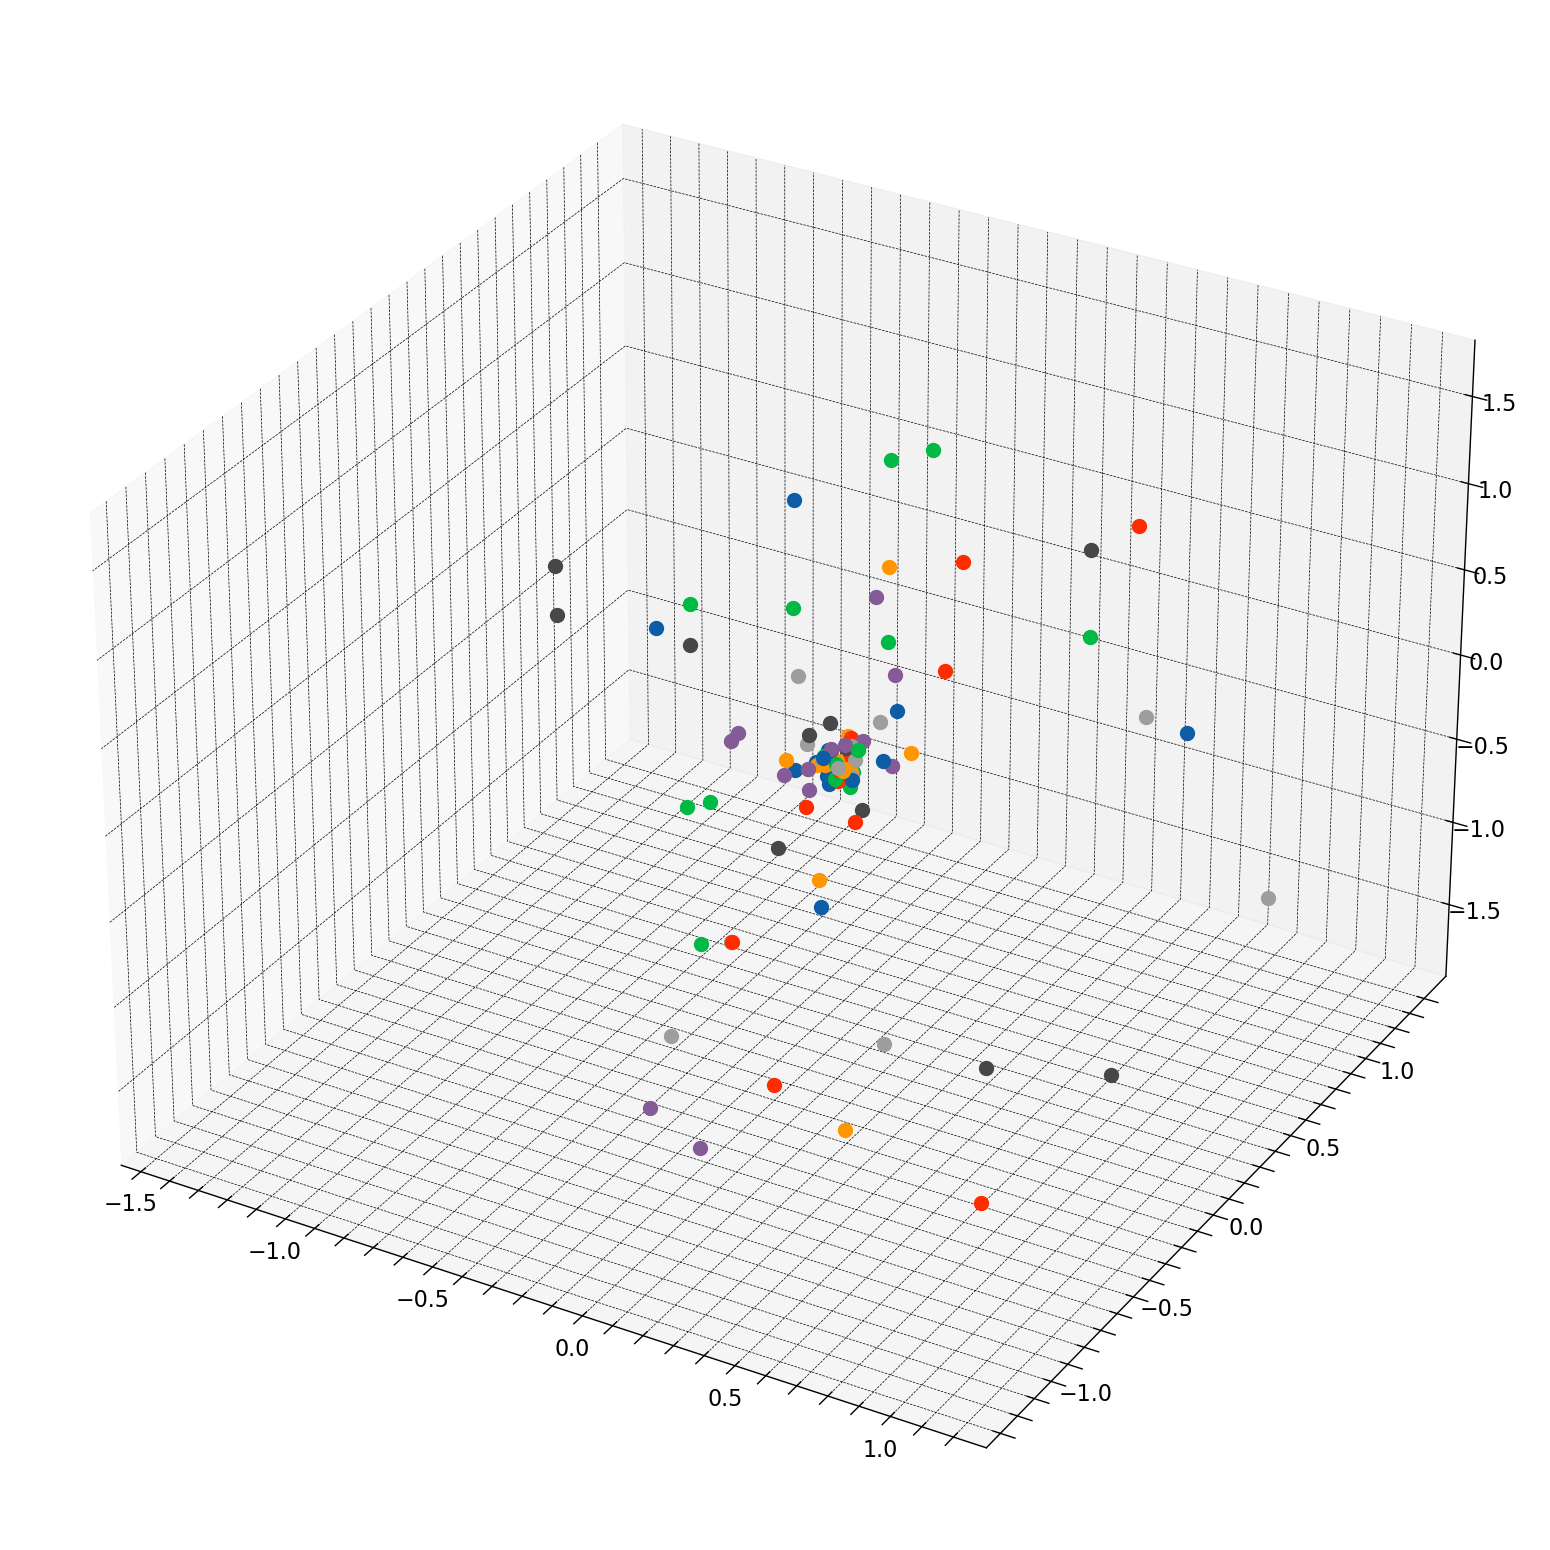

In [28]:
#fig = plt.Figure() #somehow faster than fig, ax = plt.subplots(1,1), but text doesn't work well
#ax = fig.add_subplot()
plt.rcParams['figure.figsize'] = [20 , 20]
fig, axes = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
#fig.suptitle(f'$M_1={m1}M_\odot$ , $M_2={m2}M_\odot$', fontsize=30, y=0.92)

ax = axes
ax.clear()
ax.set_xlabel('x[au]')
ax.set_ylabel('y[au]')
ax.set_zlabel('z[au]')

def animate(i):
    print(math.ceil(100*i*k/len(x[0])), "%", end='\r')
    #x_one, y_one = x1[k*i], y1[k*i]
    #x_two, y_two = x2[k*i], y2[k*i]
    #one.set_data([x_one], [y_one])
    #two.set_data([x_two], [y_two])
    ax.clear()
    ax.set_xlim(1.2*np.min(x), 1.2*np.max(x))
    ax.set_ylim(1.2*np.min(y), 1.2*np.max(y))
    ax.set_zlim(1.2*np.min(z), 1.2*np.max(z))
    for j in range(len(x[:,])):
        ax.plot3D(x[j, k*i], y[j, k*i], z[j, k*i], 'o', markersize=10)
    return fig,

writer = animation.FFMpegWriter(fps=60)
ani = animation.FuncAnimation(fig, animate, frames=int(len(x[0])/k), interval=1, blit=True)
ani.save('sphere.gif', writer=writer, dpi=100)